In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

/opt/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1

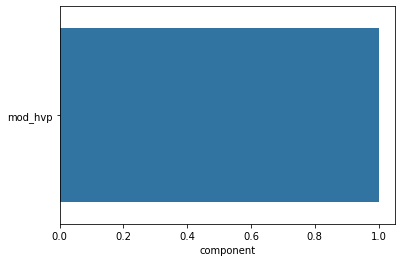

In [7]:
class Statistic:
    
    def __init__(self, panda):
        data = panda[panda['role'] == 'student']
        data.set_index('userid')
        data['userid'] = data.index
        self.data = data
        
    def media_acao(self, x):
        g = self.data[self.data['action'] == x].groupby('userid').size()
        return g.mean()
    
    def acao_aluno(self, aluno, acao):
        data = self.data
        g = data[(data['userid'] == aluno) & (data['action'] == acao)]
        sns.barplot(x = g['component'].value_counts(), y = g['component'].unique(), data = g)
        return g[g['action'] == acao]['action'].count()

    def estatisticas(self, student, action=None):
        data = self.data
        acoes = data['action'].unique().tolist()
        media_turma = []
        aluno = []
        for k in acoes:
            media_turma.append(self.media_acao(k))
            aluno.append(self.acao_aluno(student, k))
        d = {"Ação": acoes, 'Média turma': media_turma, 'Aluno': aluno}
        dat = pd.DataFrame(d)
        dat['Taxa'] = dat['Aluno']/dat['Média turma']
        if action == None:
            return dat
        else:
            sns.barplot(data=dat[dat['Ação'] == action][['Média turma', 'Aluno']]).set_title(student)
            return dat
        
    def plotar_line(self, student, action = 'viewed', day = None):
        data = self.data
        if day == 'hora':
            data['Tempo'] = data.timecreated.dt.hour
        elif day == 'semana':
            data['Tempo'] = data.timecreated.dt.weekofyear
        elif day == 'dia_semana':
            data['Tempo'] = data.timecreated.dt.weekday
        else :
            data['Tempo'] = data.timecreated.dt.dayofyear
        if student == 0:
            data[(data['action'] == action)].groupby("Tempo")['action'].count().plot(label=action, title = action)
            plt.legend()
        else:
            data[(data['action'] == action) & (data['userid'] == student)].groupby("Tempo")['action'].count().plot(label=action, title = action)
            plt.legend()
            
    def plotar_barra(self, student = 0, action = None, day = 'hora'):
        data = self.data
        if day == 'hora':
            data['Tempo'] = data.timecreated.dt.hour
        elif day == 'semana':
            data['Tempo'] = data.timecreated.dt.weekofyear
        elif day == 'dia_semana':
            data['Tempo'] = data.timecreated.dt.weekday
        else :
            data['Tempo'] = data.timecreated.dt.dayofyear
        if student == 0:
            sns.countplot(x = 'Tempo', data = data).set_title(student)
        else:
            if action == None:
                sns.countplot(x = 'Tempo', data = data[data['userid'] == student]).set_title(student)
            else:
                sns.countplot(x = 'Tempo', data = data[(data['userid'] == student) & (data['action'] == action)]).set_title(student)
                
test = Statistic(dt)
test.acao_aluno(60360, 'viewed')

In [16]:
logs = pd.read_csv('File/logs-66769.csv', parse_dates = ["timecreated"])
role = pd.read_csv('File/roles-66769.csv')
dt = pd.merge(logs, role, on='userid')

In [17]:
def split(x):
    return x.split('event')[-1][1:]
dt['eventname'] = logs['eventname'].apply(split)
dt.head()

,Unnamed: 0,id,eventname,component,action,target,objecttable,objectid,crud,edulevel,...,userid,courseid,relateduserid,anonymous,other,timecreated,origin,ip,realuserid,role
0,0,1259904343,course_created,core,created,course,course,66769.0,c,1,...,50211,66769,NaN,0,"a:2:{s:9:""shortname"";s:12:""ACH0131-2019"";s:8:""...",2019-02-05 15:37:39,web,177.141.242.47,NaN,editingteacher
1,1,1259904344,course_section_created,core,created,course_section,course_sections,5818541.0,c,1,...,50211,66769,NaN,0,"a:1:{s:10:""sectionnum"";i:0;}",2019-02-05 15:37:40,web,177.141.242.47,NaN,editingteacher
2,2,1259904345,course_section_created,core,created,course_section,course_sections,5818542.0,c,1,...,50211,66769,NaN,0,"a:1:{s:10:""sectionnum"";i:1;}",2019-02-05 15:37:40,web,177.141.242.47,NaN,editingteacher
3,3,1259904346,course_section_created,core,created,course_section,course_sections,5818543.0,c,1,...,50211,66769,NaN,0,"a:1:{s:10:""sectionnum"";i:2;}",2019-02-05 15:37:40,web,177.141.242.47,NaN,editingteacher
4,4,1259904347,course_section_created,core,created,course_section,course_sections,5818544.0,c,1,...,50211,66769,NaN,0,"a:1:{s:10:""sectionnum"";i:3;}",2019-02-05 15:37:40,web,177.141.242.47,NaN,editingteacher


In [18]:
gd = dt.set_index('userid')
data = pd.DataFrame(gd[gd['action'] == 'viewed'].loc[60360, 'component'].value_counts())
data

,component
mod_quiz,178
core,165
mod_lesson,34
mod_resource,21
mod_workshop,14
mod_questionnaire,11
mod_assign,6
mod_forum,2


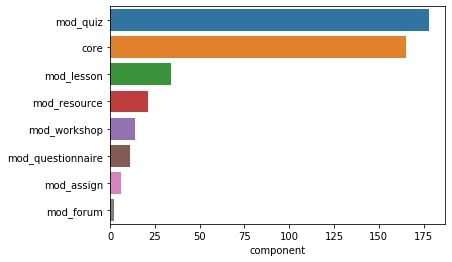

In [14]:
sns.barplot(y = data.index, x = 'component', data = data)

In [19]:
test = Statistic(dt)


/opt/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1

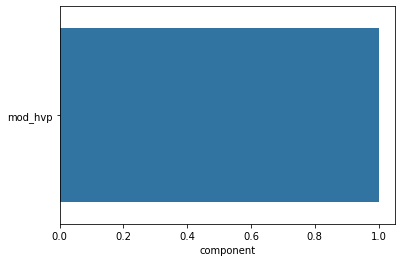

In [20]:
test.acao_aluno(60360, 'viewed')